# Batch Processing
Aidan Hunt, University of Washington

***

## Learning Objectives
After this lesson, students will be able to develop a basic script for:
- Identifying files that meet specific criteria in a given directory
- Batch processing data files and aggregating the results


## Check-in
- Homework 5 due Friday
- No Homework assigned this week
- Homework 4 grading
- See final assignment on canvas

###  Last Time
- `os` and `glob` packages help us work with files

### This Time
- Using these modules to find files and batch process
***

## Framing the Problem

**Note**: This lesson refers to the data in `Torque Cell Data.zip`, as well as the diagram `Batch Processing Problem Set-Up.pdf`, both of which are posted on the course website.

We have performed a calibration routine on two Futek TFF400 torque cells (see diagram on Canvas):
- Cells measure axial torque using strain gauges
- To calibrate, fix load cell on one end, attach lever arm (20.85cm long) to other, and hang mass from lever arm
- Record voltage output by the cell
- Repeat for several masses
- From this data, determine the torque input to volts output conversion factor.

We have data from these cells organized as follows:
`.\` (current working directory)\
&emsp;`\Torque Cell Data` (folder that contains all data for all cells)\
&emsp;&emsp;`\3B` (folder that contains all data for torque cell 3B)\
&emsp;&emsp;&emsp;`.txt files`\
&emsp;&emsp;&emsp;`...`\
&emsp;&emsp;`\CB`\ (folder that contains all data for torque cell 3C)\
&emsp;&emsp;&emsp;`.txt files`\
&emsp;&emsp;&emsp;`...`\

The text files are of the format:\
`torqueCell_ID_MMMg.txt`
- `ID` is a two character string denoting the load cell ID
- `MMM` is a three digit number denoting the mass, in grams, used to calibrate the load cell

## Building our Pseudocode Outline

First, let's start at the big picture, and consider only **one** torque cell. What would we like to do?
- Look for data files that match the format we expect
- Get average voltage and applied torque from each file
- Produce plot of torque vs voltage for the torque cell
- Estimate torque cell calibration as the slope of this line

In [134]:
# Find potential files

# Get average voltage and applied torque in each file

# Produce plot

Let's build on this:
- What tools do we have for working with files? From last lecture, the `os` and `glob` modules might be helpful.
- We'll probably want to use `glob` to find files that match a format
- To build the path to those potential files, we'll use `os`

In [135]:
import os, glob # For working with files

# Find potential files
    # Use os to create file format
    # Use glob to find files matching that format

# Get average voltage and applied torque in each file

# Produce plot

Okay, now what do we want to do when we have our files?
- We want to process each file
    - Voltage data is stored as .txt data
    - The torque is encoded in the file name (applied mass).
- For importing numeric data from .txt files, we've used `numpy` in the past.

In [136]:
import os, glob # For working with files
import numpy as np # For importing data

# Find potential files
    # Use os to create file format
    # Use glob to find files matching that format

# For each file
    # Load file using numpy
    # Get average voltage from text data
    # Get applied torque from file name
    
# Produce plot

We probably want to aggregate information from the files (especially if we are trying to plot this later). So let's think about how we want to store the voltages and torques.
- Preallocate voltage vector based on the number of files
- Preallocate mass vector based on number of files

In [137]:
import os, glob # For working with files
import numpy as np # For importing data

# Find potential files
    # Use os to create file format
    # Use glob to find files matching that format
    
# Preallocate storage based on number of files
    # Voltages
    # Mass

# For each file
    # Load file using numpy
    # Get average voltage from text data
    # Get applied mass from file name
    
# Produce plot

Okay, now on to plotting
- Need to convert mass to torque (use gravity and lever arm)
- Need matplotlib to help us plot
- Plot torque vs voltage

In [138]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
    # Use os to create file format
    # Use glob to find files matching that format
    
# Preallocate storage based on number of files
    # Voltages
    # Mass

# For each file
    # Load file using numpy
    # Get average voltage from text data
    # Get applied mass from file name
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]
    
# Produce plot
    # Create figure
    # Plot torque vs voltage
    

The last step is to estimate the calibration from the data. Once we plot it this will become clear.

In [139]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
    # Use os to create file format
    # Use glob to find files matching that format
    
# Preallocate storage based on number of files
    # Voltages
    # Mass

# For each file
    # Load file using numpy
    # Get average voltage from text data
    # Get applied mass from file name
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]
    
# Produce plot
    # Create figure
    # Plot torque vs voltage
    
# Estimate calibration somehow?

This is a great pseudocode outline to work with, and even if we hadn't made it this far/detailed, we would have still been able to set ourselves up to get started.

## Building up the solution

Let's start by building up the path to our potential files for torque cell 3B.

For now, let's just hardcode the path using, `os` to get the right separator.
Then, use glob to get a list of the files that meet this criteria:

In [140]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
filePath = os.path.join('.', 'Torque Cell Data', '3B', 'torqueCell_3B_*g.txt')
fileList = glob.glob(filePath)

# Preallocate storage based on number of files
    # Voltages
    # Mass

# For each file
    # Load file using numpy
    # Get average voltage from text data
    # Get applied mass from file name
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]
    
# Produce plot
    # Create figure
    # Plot torque vs voltage
    
# Estimate calibration somehow?

In [141]:
filePath

'.\\Torque Cell Data\\3B\\torqueCell_3B_*g.txt'

In [142]:
fileList

['.\\Torque Cell Data\\3B\\torqueCell_3B_010g.txt',
 '.\\Torque Cell Data\\3B\\torqueCell_3B_020g.txt',
 '.\\Torque Cell Data\\3B\\torqueCell_3B_050g.txt',
 '.\\Torque Cell Data\\3B\\torqueCell_3B_100g.txt',
 '.\\Torque Cell Data\\3B\\torqueCell_3B_200g.txt',
 '.\\Torque Cell Data\\3B\\torqueCell_3B_500g.txt']

Now that we know how many files we're working with, let's preallocate our storage using `numpy`

In [143]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
filePath = os.path.join('.', 'Torque Cell Data', '3B', 'torqueCell_3B_*g.txt')
fileList = glob.glob(filePath)

# Preallocate storage based on number of files
voltage = np.zeros(len(fileList))
mass = np.zeros(len(fileList))

# For each file
    # Load file using numpy
    # Get average voltage from text data
    # Get applied mass from file name
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]
    
# Produce plot
    # Create figure
    # Plot torque vs voltage
    
# Estimate calibration somehow?

In [144]:
voltage

array([0., 0., 0., 0., 0., 0.])

In [145]:
mass

array([0., 0., 0., 0., 0., 0.])

Okay, now for our core file processing loop:
- We want to do something **for** each file: use a for loop!
- We're filling in some arrays, so we want our for loop to have an index
    - `for i in range(len(fileList))`
    - `for i, currFile in enumerate(fileList)` (more readable)
- In the loop, we want to use numpy to load the data
    - The voltage is the average of the data in the file -- easy.

In [146]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
filePath = os.path.join('.', 'Torque Cell Data', '3B', 'torqueCell_3B_*g.txt')
fileList = glob.glob(filePath)

# Preallocate storage based on number of files
voltage = np.zeros(len(fileList))
mass = np.zeros(len(fileList))

for i, currFile in enumerate(fileList): # For each file
    # Load file using numpy
    currData = np.loadtxt(currFile)
    
    # Get average voltage from text data
    voltage[i] = np.mean(currData)
    
    # Get applied mass from file name
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]
    
# Produce plot
    # Create figure
    # Plot torque vs voltage
    
# Estimate calibration somehow?

Now what about the mass? Let's consider what we know about the file name format:
- The mass is represented by 3 digits.
- These digits are always followed by `g.txt`
- So, let's use this information to extract the mass value and convert it to a number we can use
- Let's use print statements to see what is happening

In [147]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
filePath = os.path.join('.', 'Torque Cell Data', '3B', 'torqueCell_3B_*g.txt')
fileList = glob.glob(filePath)

# Preallocate storage based on number of files
voltage = np.zeros(len(fileList))
mass = np.zeros(len(fileList))

for i, currFile in enumerate(fileList): # For each file
    # Load file using numpy
    currData = np.loadtxt(currFile)
    
    # Get average voltage from text data
    voltage[i] = np.mean(currData)
    
    # Get applied mass from file name
    currFile = currFile.replace('g.txt', '') # Crop out the g and extension
    print(currFile)
    currMass = float(currFile[-3:]) # Index last three characters and convert to float
    print(currMass)
    mass[i] = currMass
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]

# Produce plot
    # Create figure
    # Plot torque vs voltage
    
# Estimate calibration somehow?

.\Torque Cell Data\3B\torqueCell_3B_010
10.0
.\Torque Cell Data\3B\torqueCell_3B_020
20.0
.\Torque Cell Data\3B\torqueCell_3B_050
50.0
.\Torque Cell Data\3B\torqueCell_3B_100
100.0
.\Torque Cell Data\3B\torqueCell_3B_200
200.0
.\Torque Cell Data\3B\torqueCell_3B_500
500.0


Great, now lets convert our mass to torque and plot!
- Torque = Force x Distance
- Force = mass x gravity

Text(0, 0.5, 'Torque [N-m]')

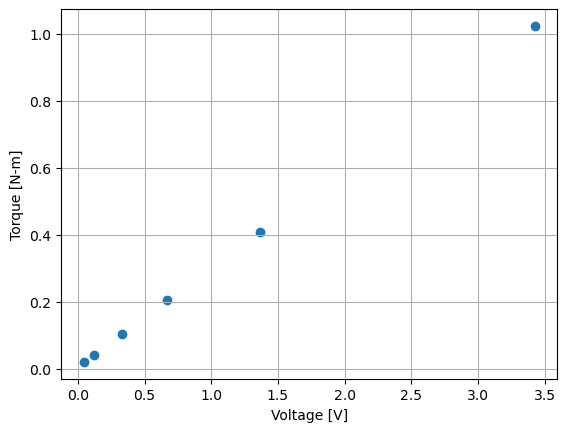

In [148]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
filePath = os.path.join('.', 'Torque Cell Data', '3B', 'torqueCell_3B_*g.txt')
fileList = glob.glob(filePath)

# Preallocate storage based on number of files
voltage = np.zeros(len(fileList))
mass = np.zeros(len(fileList))

for i, currFile in enumerate(fileList): # For each file
    # Load file using numpy
    currData = np.loadtxt(currFile)
    
    # Get average voltage from text data
    voltage[i] = np.mean(currData)
    
    # Get applied mass from file name
    currFile = currFile.replace('g.txt', '') # Crop out the g and extension
    # print(currFile)
    currMass = float(currFile[-3:]) # Index last three characters and convert to float
    # print(currMass)
    mass[i] = currMass
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]
mass = mass / 1000 # Convert to kg
torque = mass * g * L

# Produce plot
plt.figure() # Create figure
plt.scatter(voltage, torque) # Plot data
plt.grid()
plt.xlabel('Voltage [V]')
plt.ylabel('Torque [N-m]')
    
# Estimate calibration somehow?

Our last step is to estimate the calibration somehow.
- The torque cell calibration is a quantity that converts volts to torque
- That's the same as the slope of this line, which has units of Torque per Volt!
- So, let's use a line fitting tool in NumPy to fit the line and plot!

[0.29694509 0.00499928]


Text(0, 0.5, 'Torque [N-m]')

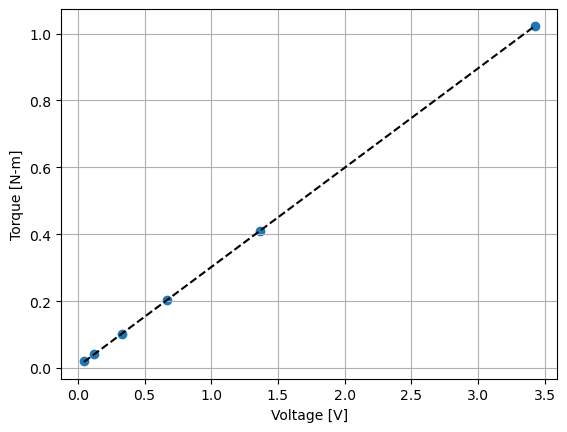

In [149]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Find potential files
filePath = os.path.join('.', 'Torque Cell Data', '3B', 'torqueCell_3B_*g.txt')
fileList = glob.glob(filePath)

# Preallocate storage based on number of files
voltage = np.zeros(len(fileList))
mass = np.zeros(len(fileList))

for i, currFile in enumerate(fileList): # For each file
    # Load file using numpy
    currData = np.loadtxt(currFile)
    
    # Get average voltage from text data
    voltage[i] = np.mean(currData)
    
    # Get applied mass from file name
    currFile = currFile.replace('g.txt', '') # Crop out the g and extension
    # print(currFile)
    currMass = float(currFile[-3:]) # Index last three characters and convert to float
    # print(currMass)
    mass[i] = currMass
    
# Convert mass to torque
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]
mass = mass / 1000 # Convert to kg
torque = mass * g * L

# Get line of best fit using polyfit
polyCoeff = np.polyfit(voltage, torque, deg=1) # Use first degree fit (line)
print(polyCoeff)

# Evaluate that polynomial at the voltages of interest to see how well it fits
fitTorque = np.polyval(polyCoeff, voltage)

# Produce plot
plt.figure() # Create figure
plt.scatter(voltage, torque) # Plot raw data
plt.plot(voltage, fitTorque, '--k') # Plot line of best fit
plt.grid()
plt.xlabel('Voltage [V]')
plt.ylabel('Torque [N-m]')

## Scalability

Now let's consider the case in which we want to perform this procedure for more than one load cell. What changes are needed?
- We hardcoded the file path before, but this changes depending on the load cell of interest

### Upgrade to work for a list of load cells
Create an outer for loop that loops over cell IDs.
- Construct the fileformat based on the current cell ID.
- Move things that don't depend on the current cell (e.g., gravity, lever arm) outside of all loops
- Create new variable that stores the calibration
- Switch plotting code to plot both load cells on same figure

.\Torque Cell Data\3B\torqueCell_3B_*g.txt
.\Torque Cell Data\3C\torqueCell_3C_*g.txt


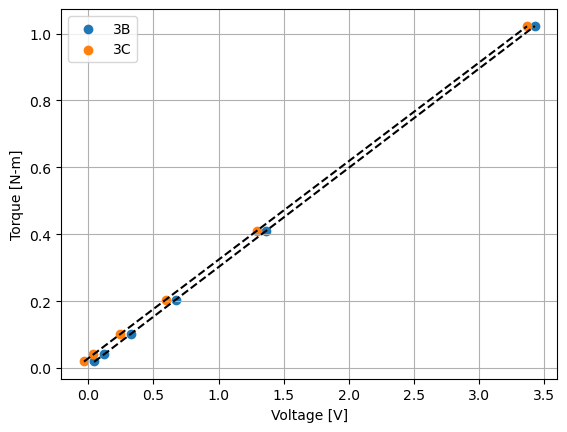

In [150]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

# Constants (don't depend on current torque cell)
g = 9.81      # Accel due to gravity [m/s^2]
L = 20.85/100 # Lever arm [m]

# Outer loop: over cell IDs
cellIDs = ['3B', '3C']
calSlopes = np.zeros(len(cellIDs))

# Create shared figure
plt.figure() # Create figure

for cellIndex, currCell in enumerate(cellIDs):
    # Find potential files (build path based on cell ID)
    filePath = os.path.join('.', 'Torque Cell Data', currCell, 'torqueCell_' + currCell + '_*g.txt')
    fileList = glob.glob(filePath)
    print(filePath)
    
    # Preallocate storage based on number of files
    voltage = np.zeros(len(fileList))
    mass = np.zeros(len(fileList))

    for i, currFile in enumerate(fileList): # For each file
        # Load file using numpy
        currData = np.loadtxt(currFile)

        # Get average voltage from text data
        voltage[i] = np.mean(currData)

        # Get applied mass from file name
        currFile = currFile.replace('g.txt', '') # Crop out the g and extension
        # print(currFile)
        currMass = float(currFile[-3:]) # Index last three characters and convert to float
        # print(currMass)
        mass[i] = currMass

    # Convert mass to torque
    mass = mass / 1000 # Convert to kg
    torque = mass * g * L

    # Get line of best fit using polyfit
    polyCoeff = np.polyfit(voltage, torque, deg=1) # Use first degree fit (line)
    calSlopes[cellIndex] = polyCoeff[0]

    # Evaluate that polynomial at the voltages of interest to see how well it fits
    fitTorque = np.polyval(polyCoeff, voltage)

    # Produce plot
    plt.scatter(voltage, torque, label=currCell) # Plot raw data
    plt.plot(voltage, fitTorque, '--k') # Plot line of best fit

plt.grid()
plt.xlabel('Voltage [V]')
plt.ylabel('Torque [N-m]')
plt.legend()

In [151]:
# Show calibration slopes
print(calSlopes)

[0.29694509 0.29490938]


### Define a function
Let's wrap this in a function so that we can use it for any specified torque cell IDs! This further separates the parts of our code we *expect* to change (the torque cell IDs) from the parts we *don't expect* to change (our core processing).

In [152]:
import os, glob # For working with files
import numpy as np # For importing data
import matplotlib.pyplot as plt # For plotting data

def findCalibration(cellID):
    '''
    Given a load cell ID as a string (e.g., '3B'), looks for data files in the
    'Torque Cell Data' folder of the current directory. Computes and returns
    the voltage to torque calibration slope from the data using a 1st degree least
    squares fit. Additionally, a plot of torque vs voltage is generated, and 
    shows a line with the calibration slope.
    '''
    # Constants (don't depend on current torque cell)
    g = 9.81      # Accel due to gravity [m/s^2]
    L = 20.85/100 # Lever arm [m]

    # Outer loop: over cell IDs
    calSlopes = np.zeros(len(cellIDs))

    # Create shared figure
    plt.figure() # Create figure

    for cellIndex, currCell in enumerate(cellIDs):
        # Find potential files (build path based on cell ID)
        filePath = os.path.join('.', 'Torque Cell Data', currCell, 'torqueCell_' + currCell + '_*g.txt')
        fileList = glob.glob(filePath)
        print(filePath)

        # Preallocate storage based on number of files
        voltage = np.zeros(len(fileList))
        mass = np.zeros(len(fileList))

        for i, currFile in enumerate(fileList): # For each file
            # Load file using numpy
            currData = np.loadtxt(currFile)

            # Get average voltage from text data
            voltage[i] = np.mean(currData)

            # Get applied mass from file name
            currFile = currFile.replace('g.txt', '') # Crop out the g and extension
            # print(currFile)
            currMass = float(currFile[-3:]) # Index last three characters and convert to float
            # print(currMass)
            mass[i] = currMass

        # Convert mass to torque
        mass = mass / 1000 # Convert to kg
        torque = mass * g * L

        # Get line of best fit using polyfit
        polyCoeff = np.polyfit(voltage, torque, deg=1) # Use first degree fit (line)
        calSlopes[cellIndex] = polyCoeff[0]

        # Evaluate that polynomial at the voltages of interest to see how well it fits
        fitTorque = np.polyval(polyCoeff, voltage)

        # Produce plot
        plt.scatter(voltage, torque, label=currCell) # Plot raw data
        plt.plot(voltage, fitTorque, '--k') # Plot line of best fit

    # Format figure
    plt.grid()
    plt.xlabel('Voltage [V]')
    plt.ylabel('Torque [N-m]')
    plt.legend()
    
    return calSlopes

.\Torque Cell Data\3B\torqueCell_3B_*g.txt
.\Torque Cell Data\3C\torqueCell_3C_*g.txt


array([0.29694509, 0.29490938])

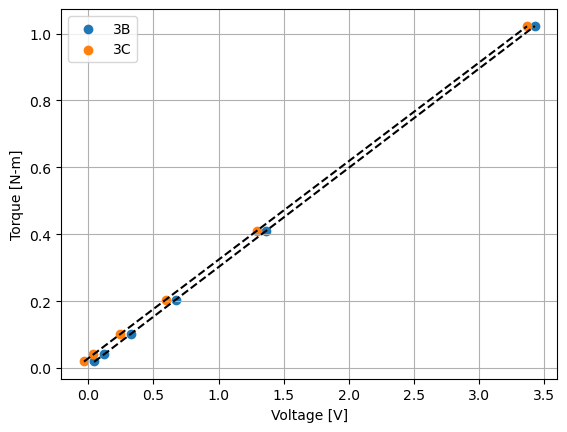

In [153]:
findCalibration(['3B', '3C'])